In [2]:
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pylab import *
import itertools

In [3]:
nodes = []

with open('C:\\Users\\Giorgio\\Desktop\\hw5\\USA-road-d.CAL.co', 'r') as f,\
        open('C:\\Users\\Giorgio\\Desktop\\hw5\\USA-road-d.CAL.co.csv', 'w') as fo:
    fow = csv.writer(fo)
    for row in csv.reader(f):
        if row[0][0] == 'v':
            fow.writerow(row)
            tmp = row[0].split()
            nodes.append(int(tmp[1]))

In [4]:
coord = pd.read_csv('C:\\Users\\Giorgio\\Desktop\\hw5\\USA-road-d.CAL.co.csv', sep=' ', delimiter=None, header=None)
coord = coord.drop(coord.columns[0], axis=1)
coord.columns = ['node', 'coord1', 'coord2']
coord.set_index('node', inplace=True)

In [5]:
def graphT(timeGraph):
    with open('C:\\Users\\Giorgio\\Desktop\\hw5\\USA-road-t.CAL.gr', 'r') as f2:
        for row in csv.reader(f2):
            if row[0][0] == 'a':
                # writer.writerow(row)
                tmp = row[0].split()
                p1 = int(coord.loc[int(tmp[1]), 'coord1'])
                p2 = int(coord.loc[int(tmp[1]), 'coord2'])
                pos = [p1, p2]
                timeGraph.add_edge(int(tmp[1]), int(tmp[2]), weight=int(tmp[3]))
                timeGraph.add_node(int(tmp[1]), p=pos) 

    return timeGraph

In [6]:
def graphD(distanceGraph, baseGraph):
    with open('C:\\Users\\Giorgio\\Desktop\\hw5\\USA-road-d.CAL.gr', 'r') as f1:
        for row in csv.reader(f1):
            if row[0][0] == 'a':
                tmp = row[0].split()
                p1 = int(coord.loc[int(tmp[1]), 'coord1'])
                p2 = int(coord.loc[int(tmp[1]), 'coord2'])
                pos = [p1, p2]
                distanceGraph.add_node(int(tmp[1]), p=pos)
                baseGraph.add_node(int(tmp[1]), p=pos)
                distanceGraph.add_edge(int(tmp[1]), int(tmp[2]), weight=int(tmp[3]))
                baseGraph.add_edge(int(tmp[1]), int(tmp[2]), weight=1)
               
    return distanceGraph, baseGraph

In [7]:
distanceGraph = nx.Graph()
baseGraph = nx.Graph()
timeGraph = nx.Graph()
distanceGraph,baseGraph=graphD(distanceGraph,baseGraph)
timeGraph=graphT(timeGraph)

In [22]:
def createPath(typec, nodes, arrList, min=None):
    if min == None: min = float('Inf')
    if typec == 't': graph = timeGraph
    if typec == 'd': graph = distanceGraph
    if typec == 'network': graph = baseGraph
    res = []
    x = 0
    l = order(graph, nodes, arrList[0])
    if l != ('Imp'):
        x += l[0]
        if x < min:
            for i in l[1]:
                res.append(i)
        else:
            return 'Over'
    else:
        res = [('Imp')]
        return res
    for n in range(len(arrList) - 1):
        l = order(graph, arrList[n], arrList[n + 1])
        if l != ('Imp'):
            x += l[0]
            if x < min:
                for i in l[1][1:]:
                    res.append(i)
            else:
                return 'Over'
        else:
            res = [('Imp')]
            return res

    return (res, x)

In [23]:
def order(graph, nodes, dest):
    if graph.has_node(nodes) == False or graph.has_node(dest) == False:
        cb = ('Imp')
        return cb
    if nx.has_path(graph, nodes, dest):

        prior = [-1] * (len(graph.nodes) + 1)
        lisp = [float('Inf')] * (len(graph.nodes) + 1)
        meet = set()
        lisp[nodes] = 0
        prior[nodes] = nodes
        l = [item for item in lisp]
        while (dest not in meet):
            actualNode = l.index(min(l))
            meet.add(actualNode)
            l[actualNode] = float('Inf')
            for v in graph.adj[actualNode]:
                if lisp[v] > lisp[actualNode] + graph[actualNode][v]['weight']:
                    lisp[v] = lisp[actualNode] + graph[actualNode][v]['weight']
                    l[v] = lisp[actualNode] + graph[actualNode][v]['weight']
                    prior[v] = actualNode
        path = []
        index = dest
        nodes = prior[index]
        while index != nodes:
            path.append(index)
            index = nodes
            nodes = prior[index]
        path.append(nodes)
        res = (lisp[dest], path[::-1])
    else:
        res = ('Imp')
    return res

In [24]:
def visualize(graph):
    g_vis = baseGraph.subgraph(graph)
    pos = nx.get_node_attributes(g_vis, 'p')
    dist_color = 'red'
    draw_networkx(g_vis, pos, with_labels=False, node_size=10, node_color='b', width=2, edge_color=dist_color)
    nx.draw_networkx_nodes(g_vis, pos, nodelist=[1], node_color='b', node_size=100)
    plt.show()

In [25]:
def main():
    #list= choose the list of node to visit the format will be: list= [n,n,n,n]
    listc=[1048577, 1690, 1692, 1694, 1048937,1715]
    #type = choose between time, network or distance
    typec='network'
    #s= choose the first node
    s=1
    f3=createPath(typec,s, listc)[0]
    visualize(f3)

C:\Users\Giorgio\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


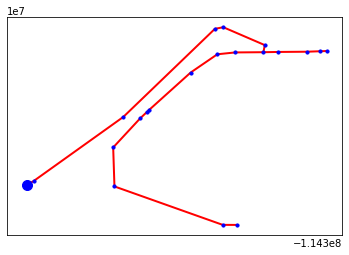

In [26]:
main()